<a href="https://colab.research.google.com/github/tatamiya/blog_artifacts/blob/main/zenn/20230918_multicolinearity/%E5%AE%8C%E5%85%A8%E3%81%AA%E5%A4%9A%E9%87%8D%E5%85%B1%E7%B7%9A%E6%80%A7%E3%81%8C%E3%81%82%E3%82%8B%E3%81%A8%E3%81%8D%E3%81%AE%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E4%BF%82%E6%95%B0%E3%81%AE%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
sample_size = 10

sigma1 = 4
x1 = sigma1 * np.random.randn(sample_size) + 1

In [3]:
coef = 2.0

x2 = x1 * coef

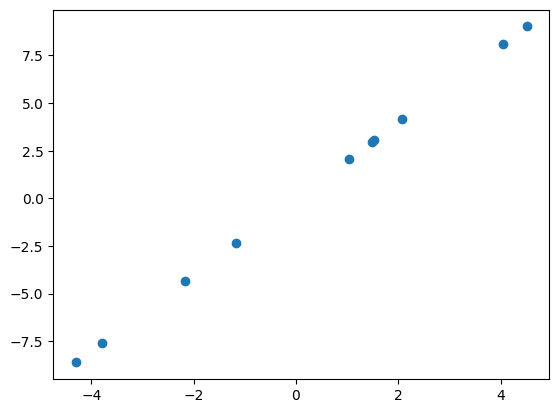

In [4]:
plt.scatter(x1, x2)

In [5]:
# design matrix
x_mat = np.r_[[np.ones(sample_size), x1, x2]].T
x_mat

array([[ 1.        , -3.79447684, -7.58895368],
       [ 1.        , -2.16241686, -4.32483372],
       [ 1.        , -1.16785457, -2.33570915],
       [ 1.        ,  2.0703891 ,  4.14077821],
       [ 1.        ,  4.51163297,  9.02326594],
       [ 1.        ,  1.48873685,  2.97747369],
       [ 1.        ,  1.03658679,  2.07317359],
       [ 1.        ,  4.05362549,  8.10725097],
       [ 1.        , -4.30636889, -8.61273778],
       [ 1.        ,  1.52735189,  3.05470379]])

In [6]:
# coefficients
beta = np.array([1, 1, 1])

# std of error term
sigma = 1.5

In [7]:
# Moore-Penrose Inverse
x_pinv = np.linalg.pinv(x_mat)

In [8]:
beta0 = x_pinv @ x_mat @ beta
beta0

array([1. , 0.6, 1.2])

# 係数の推定（最小二乗法）

In [9]:
eps_vec = np.random.randn(sample_size) * sigma
y = np.dot(x_mat, beta) + eps_vec
y

array([ -8.66793884,  -4.50502799,  -1.6203307 ,   4.38535179,
        16.05261999,   7.10612196,   4.8182837 ,  12.59973674,
       -11.07647836,   6.44413494])

In [10]:
# LSM (w=0)
beta_hat_0 = np.dot(x_pinv, y)

beta_hat_0

array([1.62250939, 0.57174029, 1.14348059])

In [11]:
def plot_line(func, x_min, x_max, ax, **args):
  _x = x_min + (x_max - x_min) * np.arange(0, 1, 1/20)
  _y = func(_x)

  return ax.plot(_x, _y, **args)

In [12]:
const = beta_hat_0[2] + 0.5 * beta_hat_0[1]
const

1.4293507348362526

Text(0, 0.5, '$\\hat{\\beta}_2$')

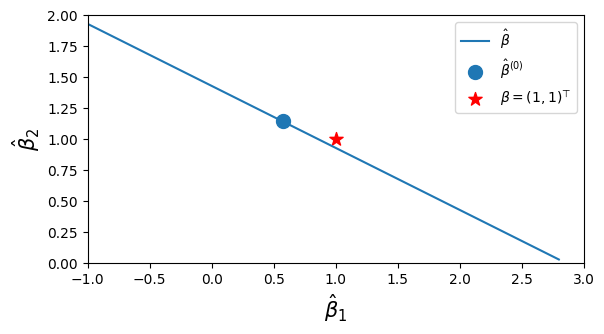

In [13]:
fig, ax = plt.subplots()
ax.set_box_aspect(0.5)

x_min = -1.0
x_max = 3.0

plot_line(lambda x: -0.5*x + const, x_min, x_max, ax, ls="-", label="$\\hat{\\beta}$")

ax.scatter(x=beta_hat_0[1], y=beta_hat_0[2], s=100, label="$\\hat{\\beta}^{(0)}$")

ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)^\\top$")

ax.legend()

ax.set_xlim(x_min, x_max)
ax.set_ylim(0,(x_max - x_min)*0.5)

ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

# 複数回試行した結果

$\boldsymbol{X}$ は変えずに、誤差項 $\{ɛ_i\}_{i=1}^n$ を変えて推定を繰り返し、推定量の分布を見た。

In [14]:
n_iter = 1000
list_beta_hat = []

x_pinv = np.linalg.pinv(x_mat)

for i in range(0, n_iter):
  eps_vec = np.random.randn(sample_size) * sigma
  y = np.dot(x_mat, beta) + eps_vec
  beta_hat = np.dot(x_pinv, y)
  list_beta_hat.append(beta_hat)

beta_hat_samples = np.array(list_beta_hat)

In [15]:
beta_hat_samples.mean(0)

array([1.02760168, 0.5992788 , 1.1985576 ])

In [16]:
band_width = sigma / np.sqrt(5 * ((x1 - x1.mean())**2).sum()) * norm.ppf(0.975)
ratio = band_width / np.linalg.norm(np.array([3/5, 6/5]))

c_threshold_lower = 1.5 * (1 - ratio)
c_threshold_upper = 1.5 * (1 + ratio)

(0.0, 2.0)

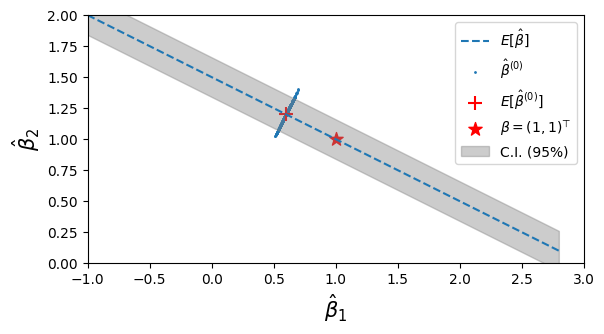

In [17]:
beta_hat_samples = np.array(list_beta_hat)
beta1_hat = beta_hat_samples[:, 1]
beta2_hat = beta_hat_samples[:, 2]

fig, ax = plt.subplots()
ax.set_box_aspect(0.5)

x_min = -1.0
x_max = 3.0

plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", label="$E[\\hat{\\beta}]$")

_x = x_min + (x_max - x_min) * np.arange(0, 1, 1/20)
y_upper = -0.5*_x + c_threshold_upper
y_lower = -0.5*_x + c_threshold_lower

ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}^{(0)}$")
ax.scatter(beta0[1], beta0[2], color="red", s=100, marker="+", label="$E[\\hat{\\beta}^{(0)}]$")
ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)^\\top$")

ax.fill_between(_x, y_lower, y_upper, alpha=0.4, color="gray", label="C.I. (95%)")

ax.legend()

ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

ax.set_xlim(x_min, x_max)
ax.set_ylim(0,(x_max - x_min)*0.5)

In [18]:
(np.linalg.norm(beta_hat_samples[:, 1:] - beta0[1:], axis=1) > sigma  * norm.ppf(0.975) / np.sqrt(5 * ((x1 - x1.mean())**2).sum())).sum()

43

(0.0, 2.0)

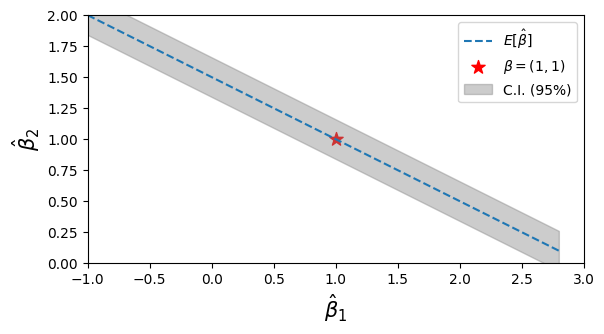

In [19]:
# beta0 のプロットを載せない版

fig, ax = plt.subplots()
ax.set_box_aspect(0.5)

x_min = -1.0
x_max = 3.0

plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", label="$E[\\hat{\\beta}]$")

_x = x_min + (x_max - x_min) * np.arange(0, 1, 1/20)
y_upper = -0.5*_x + c_threshold_upper
y_lower = -0.5*_x + c_threshold_lower

ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)$")

ax.fill_between(_x, y_lower, y_upper, alpha=0.4, color="gray", label="C.I. (95%)")

ax.legend()

ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

ax.set_xlim(x_min, x_max)
ax.set_ylim(0,(x_max - x_min)*0.5)

# Ridge 回帰

<ipython-input-32-86545467856d>:102: RuntimeWarning: invalid value encountered in sqrt
  ellipse_width = np.sqrt(cov_eig_val[0]) * z_alpha * 2


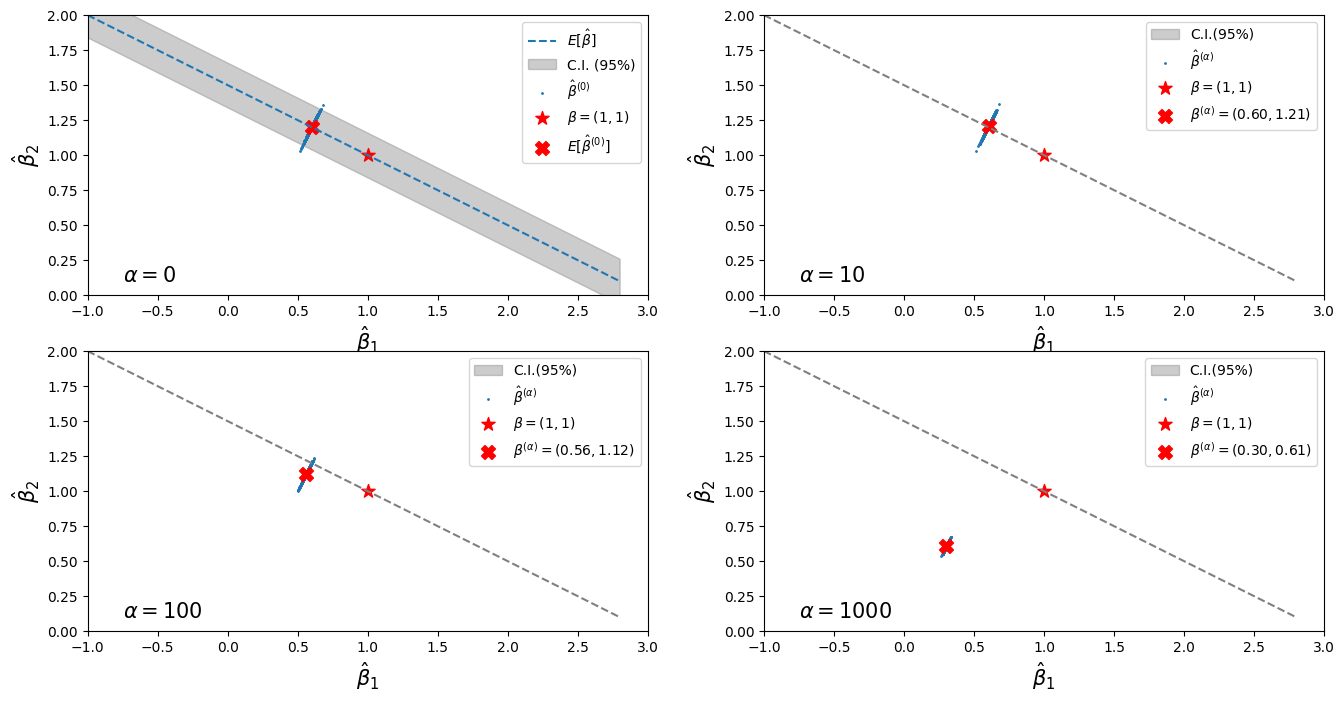

In [32]:
np.random.seed(17)

sample_size=10

# x1 の生成
x1 = sigma1 * np.random.randn(sample_size) + 1

# x2 の生成
x2 = x1 * coef

# design matrix
x_mat = np.r_[[np.ones(sample_size), x1, x2]].T

fig, axes = plt.subplots(2,2, figsize=(16, 8))


# alpha=0
ax = axes.flatten()[0]
ax.set_box_aspect(0.5)

x_pinv = np.linalg.pinv(x_mat)
list_beta_hat = []

for i in range(0, n_iter):
  eps_vec = np.random.randn(sample_size) * sigma
  y = np.dot(x_mat, beta) + eps_vec
  beta_hat = np.dot(x_pinv, y)
  list_beta_hat.append(beta_hat)

beta_hat_samples = np.array(list_beta_hat)

beta_hat_samples = np.array(list_beta_hat)
beta1_hat = beta_hat_samples[:, 1]
beta2_hat = beta_hat_samples[:, 2]

x_min = -1.0
x_max = 3.0

plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", label="$E[\\hat{\\beta}]$")

_x = x_min + (x_max - x_min) * np.arange(0, 1, 1/20)
y_upper = -0.5*_x + c_threshold_upper
y_lower = -0.5*_x + c_threshold_lower

ax.fill_between(_x, y_lower, y_upper, alpha=0.4, color="gray", label="C.I. (95%)")
ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}^{(0)}$")
ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)$")
ax.scatter(beta0[1], beta0[2], color="red", s=100, marker="X", label="$E[\\hat{\\beta}^{(0)}]$")




#ax.text(-0.75,0.3, "$\\rho={}$".format(rho), fontsize=15)
ax.text(-0.75,0.1, "$\\alpha = 0$", fontsize=15)

ax.legend()

ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

ax.set_xlim(x_min, x_max)
ax.set_ylim(0,(x_max - x_min)*0.5)

for alpha, ax in zip((10, 100, 1000), axes.flatten()[1:]):

  # X^\top X
  xtx = x_mat.T @ x_mat
  ridge_mat = np.linalg.inv(xtx + alpha*np.identity(3))
  ridge_est_op = ridge_mat @ x_mat.T

  # Ridge 推定量の期待値
  ridge_beta = ridge_mat @ xtx @ beta


  # 誤差項を変えて複数回試行し、推定量の分布を求める。
  list_beta_hat = []

  for i in range(0, n_iter):
    eps_vec = np.random.randn(sample_size) * sigma
    y = np.dot(x_mat, beta) + eps_vec
    beta_hat = np.dot(ridge_est_op, y)
    list_beta_hat.append(beta_hat)

  beta_hat_samples = np.array(list_beta_hat)


  # 作図
  x_min = -1.0
  x_max = 3.0

  beta_hat_samples = np.array(list_beta_hat)
  beta1_hat = beta_hat_samples[:, 1]
  beta2_hat = beta_hat_samples[:, 2]


  ax.set_box_aspect(0.5)

  ## 推定量分布の95%領域を表す楕円
  z_alpha = norm.ppf(0.975)
  cov = sigma ** 2 * (ridge_mat @ xtx @ ridge_mat)[1:, 1:]  # 推定量の分散共分散行列
  cov_eig_val, cov_eig_vec = np.linalg.eig(cov)
  ellipse_width = np.sqrt(cov_eig_val[0]) * z_alpha * 2
  ellipse_height = np.sqrt(cov_eig_val[1]) * z_alpha * 2
  ellipse_angle = np.arctan2(cov_eig_vec[1,0], cov_eig_vec[0,0]) / np.pi * 180

  ellipse = Ellipse((ridge_beta[1], ridge_beta[2]), width=ellipse_width, height=ellipse_height, angle=ellipse_angle, color="gray", alpha=0.4, label="C.I.(95%)")
  ax.add_patch(ellipse)

  plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", color="gray")

  ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}^{{(\\alpha)}}$")

  ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)$")
  ax.scatter(ridge_beta[1], ridge_beta[2], color="red", s=100, marker="X", label="$\\beta^{{(\\alpha)}}=({:.2f},{:.2f})$".format(ridge_beta[1], ridge_beta[2]))

  #ax.text(-0.75,0.3, "$\\rho={}$".format(rho), fontsize=15)
  ax.text(-0.75,0.1, "$\\alpha = {}$".format(alpha), fontsize=15)

  ax.legend()

  ax.set_xlim(x_min, x_max)
  ax.set_ylim(0,(x_max - x_min) * 0.5)

  ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
  ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

In [27]:
cov_eig_val

array([0.        , 0.00055957])